<a href="https://colab.research.google.com/github/Ashara-kosi/Data-analysis-projects/blob/master/BigMartSalesdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score

train = pd.read_csv('BigMart - Train.csv')
test = pd.read_csv('BigMart - Test data.csv')

In [ ]:
train.tail(10)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
#checking for null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#replacing the categorical null values with mode and the numerical ones with the mean
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)
train['Item_Weight'].fillna(train['Item_Weight'].mean, inplace=True)


In [ ]:
#testing 
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
train['Item_Type'].value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
train['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#replacing the values in Item fat content
train['Item_Fat_Content']= train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
train['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#converting the categories into numbers using map function
train['Outlet_Size'] = train['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})
train['Item_Type'] = train['Item_Type'].map({'Fruits and Vegetables' :0,'Snack Foods':1 ,'Household':2,
                                             'Frozen Foods':3,'Dairy':4,'Canned':5,'Baking Goods':6,
                                             'Health and Hygiene':7,'Soft Drinks':8,'Meat':9,'Breads':10,
                         
                                             'Hard Drinks':11,'Others':12,'Starchy Foods':13,'Breakfast':14,
                                             'Seafood':15})
train['Outlet_Type'] = train['Outlet_Type'].map({'Supermarket Type1':0,'Grocery Store':3,'Supermarket Type3':2
                                                 ,'Supermarket Type2':1})
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})




In [ ]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,0,0.016047,4,249.8092,OUT049,1999,1,0,0,3735.1380
1,DRC01,5.92,1,0.019278,8,48.2692,OUT018,2009,1,2,1,443.4228
2,FDN15,17.5,0,0.016760,9,141.6180,OUT049,1999,1,0,0,2097.2700
3,FDX07,19.2,1,0.000000,0,182.0950,OUT010,1998,1,2,3,732.3800
4,NCD19,8.93,0,0.000000,2,53.8614,OUT013,1987,2,2,0,994.7052
5,FDP36,10.395,1,0.000000,6,51.4008,OUT018,2009,1,2,1,556.6088
6,FDO10,13.65,1,0.012741,1,57.6588,OUT013,1987,2,2,0,343.5528
7,FDP10,<bound method Series.mean of 0 9.3\n1 ...,0,0.127470,1,107.7622,OUT027,1985,1,2,2,4022.7636
8,FDH17,16.2,1,0.016687,3,96.9726,OUT045,2002,1,1,0,1076.5986
9,FDU28,19.2,1,0.094450,3,187.8214,OUT017,2007,1,1,0,4710.5350


In [ ]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
#checking for null values
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
#replacing the categorical null values with mode and the numerical ones with the mean
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean, inplace=True)


In [ ]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [ ]:
#replacing the values in Item fat content
test['Item_Fat_Content']= test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
test['Item_Fat_Content'].value_counts()


Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [ ]:
#converting the categories into numbers using map function
test['Outlet_Size'] = test['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})
test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})
test['Item_Type'] = test['Item_Type'].map({'Fruits and Vegetables' :0,'Snack Foods':1 ,'Household':2,
                                             'Frozen Foods':3,'Dairy':4,'Canned':5,'Baking Goods':6,
                                             'Health and Hygiene':7,'Soft Drinks':8,'Meat':9,'Breads':10,
                         
                                             'Hard Drinks':11,'Others':12,'Starchy Foods':13,'Breakfast':14,
                                             'Seafood':15})
test['Outlet_Type'] = test['Outlet_Type'].map({'Supermarket Type1':0,'Grocery Store':3,'Supermarket Type3':2
                                                 ,'Supermarket Type2':1})
test['Outlet_Location_Type'] = test['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})




In [ ]:
test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,1,0.013496,1,141.3154,OUT046,1997,0,0,0
5677,FDD47,7.6,1,0.142991,13,169.1448,OUT018,2009,1,2,1
5678,NCO17,10,0,0.073529,7,118.7440,OUT045,2002,1,1,0
5679,FDJ26,15.3,1,0.000000,5,214.6218,OUT017,2007,1,1,0
5680,FDU37,9.5,1,0.104720,5,79.7960,OUT045,2002,1,1,0


In [ ]:
train.to_csv('train_clean')
test.to_csv('test_clean')

RecursionError: ignored

Defining the architecture of the model


In [ ]:
import keras
import tensorflow as tf

In [ ]:
test.dtypes

Item_Identifier               object
Item_Weight                   object
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object

In [ ]:
train.dtypes

Item_Identifier               object
Item_Weight                   object
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [ ]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Item_Weight'], axis=1)
test = test.drop(['Item_Identifier','Outlet_Identifier','Item_Weight'], axis=1)


In [ ]:
train.tail()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,0,0.056783,1,214.5218,1987,2,2,0,2778.3834
8519,1,0.046982,6,108.1570,2002,1,1,0,549.2850
8520,0,0.035186,7,85.1224,2004,0,1,0,1193.1136
8521,1,0.145221,1,103.1332,2009,1,2,1,1845.5976
8522,0,0.044878,8,75.4670,1997,0,0,0,765.6700


In [ ]:
#to convert the datatypes to float
#train['Item_Weight'] = train['Item_Weight'].astype(int())
#train['Item_Weight'].value_counts()

In [ ]:
test.shape

(5681, 8)

In [ ]:
train.shape

(8523, 9)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           8523 non-null   int64  
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   int64  
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   int64  
 7   Outlet_Type                8523 non-null   int64  
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 599.4 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           5681 non-null   int64  
 1   Item_Visibility            5681 non-null   float64
 2   Item_Type                  5681 non-null   int64  
 3   Item_MRP                   5681 non-null   float64
 4   Outlet_Establishment_Year  5681 non-null   int64  
 5   Outlet_Size                5681 non-null   int64  
 6   Outlet_Location_Type       5681 non-null   int64  
 7   Outlet_Type                5681 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 355.2 KB


In [ ]:
X_train.shape

NameError: ignored

In [ ]:
Y_train.shape

NameError: ignored

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import InputLayer,Dense

In [ ]:
X_train = train.drop('Item_Outlet_Sales',axis=1)
Y_train = train['Item_Outlet_Sales']
X_test = test



In [ ]:
X_test.shape

(5681, 8)

In [ ]:
input_neurons = X_train.shape[1]

In [ ]:
output_neurons = 1

In [ ]:
number_of_hidden_layers = 2
hidden_layer_1 = 8
hidden_layer_2 = 4


In [ ]:
#defining the architectures
model= Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=hidden_layer_1,activation='elu'))
model.add(Dense(units=hidden_layer_2,activation='elu'))
model.add(Dense(units=output_neurons,activation='linear'))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compiling loss
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

In [ ]:
#Training the model properly
model_history = model.fit(X_train,Y_train,epochs=50,validation_split=0.2)

Epoch 1/50
214/214 [==============================] - 0s 2ms/step - loss: 7211983.5000 - accuracy: 0.0000e+00 - val_loss: 7243683.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
214/214 [==============================] - 0s 2ms/step - loss: 7207577.5000 - accuracy: 0.0000e+00 - val_loss: 7239307.5000 - val_accuracy: 0.0000e+00
Epoch 3/50
214/214 [==============================] - 0s 2ms/step - loss: 7203177.0000 - accuracy: 0.0000e+00 - val_loss: 7234944.5000 - val_accuracy: 0.0000e+00
Epoch 4/50
214/214 [==============================] - 0s 2ms/step - loss: 7198770.0000 - accuracy: 0.0000e+00 - val_loss: 7230580.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
214/214 [==============================] - 0s 2ms/step - loss: 7194397.0000 - accuracy: 0.0000e+00 - val_loss: 7226248.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
214/214 [==============================] - 0s 2ms/step - loss: 7190024.0000 - accuracy: 0.0000e+00 - val_loss: 7221914.5000 - val_accuracy: 0.0000e+00
Epoch 7/50
214/214 [========

In [ ]:
# |X_train.dtypes

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


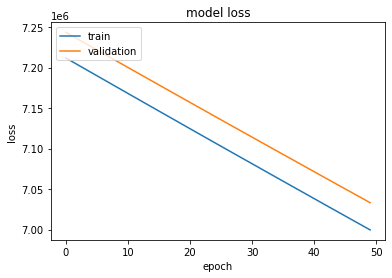

In [ ]:
import matplotlib.pyplot as plt
print(model_history.history.keys())
# "Loss"
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


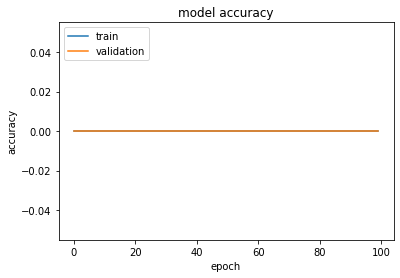

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
predict_sales = model.predict(test)

In [ ]:
predict_sales

AttributeError: ignored